# ALP Data Mining
### Vanessa Christie - 0706022110012

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('C:\Data Mining\Student_Prediction\data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
df = df.drop_duplicates()

In [6]:
numeric_columns = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804841,1,19,12,...,0,0,0,0,-1.963489,0,-0.287638,0.124386,0.765761,Dropout
1,1,15,1,9254,1,1,2.076819,1,1,3,...,0,6,6,6,0.659562,0,0.876222,-1.105222,0.347199,Graduate
2,1,1,5,9070,1,1,-0.804841,1,37,37,...,0,6,0,0,-1.963489,0,-0.287638,0.124386,0.765761,Dropout
3,1,17,2,9773,1,1,-0.804841,1,38,37,...,0,6,10,5,0.416450,0,-0.813253,-1.466871,-1.375511,Graduate
4,2,39,1,8014,0,1,-2.473171,1,37,38,...,0,6,6,6,0.531608,0,0.876222,-1.105222,0.347199,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,-0.577342,1,1,1,...,0,6,8,5,0.467631,0,1.476924,1.137005,-1.789667,Graduate
4420,1,1,2,9773,1,1,-0.956508,105,1,1,...,0,6,6,2,0.147747,0,-0.175007,-0.454253,0.889126,Dropout
4421,1,1,1,9500,1,1,1.621820,1,37,37,...,0,8,9,1,0.627573,0,0.876222,-1.105222,0.347199,Dropout
4422,1,1,1,9147,1,1,3.593483,1,37,37,...,0,5,6,5,0.339678,0,-0.813253,-1.466871,-1.375511,Graduate


In [7]:
df["Target"] = df["Target"].map({"Dropout": 0,  "Graduate": 1, "Enrolled": 2})
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804841,1,19,12,...,0,0,0,0,-1.963489,0,-0.287638,0.124386,0.765761,0
1,1,15,1,9254,1,1,2.076819,1,1,3,...,0,6,6,6,0.659562,0,0.876222,-1.105222,0.347199,1
2,1,1,5,9070,1,1,-0.804841,1,37,37,...,0,6,0,0,-1.963489,0,-0.287638,0.124386,0.765761,0
3,1,17,2,9773,1,1,-0.804841,1,38,37,...,0,6,10,5,0.416450,0,-0.813253,-1.466871,-1.375511,1
4,2,39,1,8014,0,1,-2.473171,1,37,38,...,0,6,6,6,0.531608,0,0.876222,-1.105222,0.347199,1


# Exploratory Data Analysis

C:\Users\Vanessa\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\Vanessa\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\Vanessa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


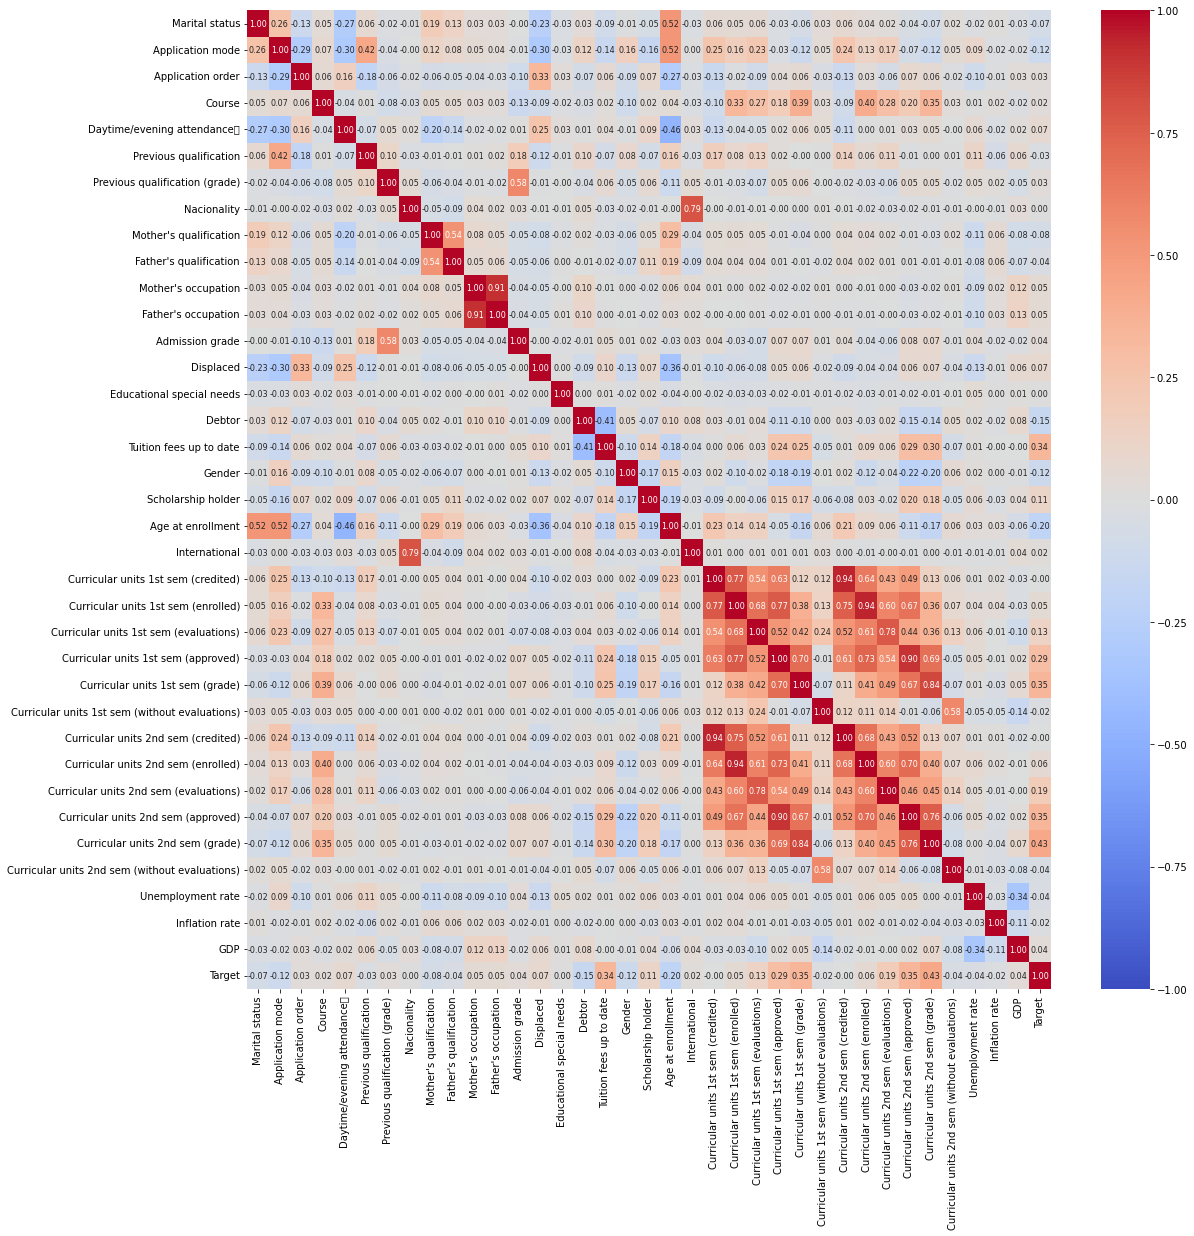

In [8]:
plt.figure(figsize=(18, 18)) 
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"fontsize": 8})
plt.show()

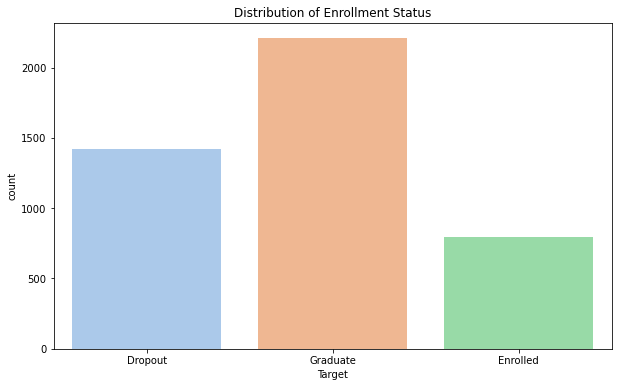

In [9]:
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.xticks(ticks=[0, 1, 2], labels=["Dropout", "Graduate", "Enrolled"])
plt.title('Distribution of Enrollment Status')
plt.show()

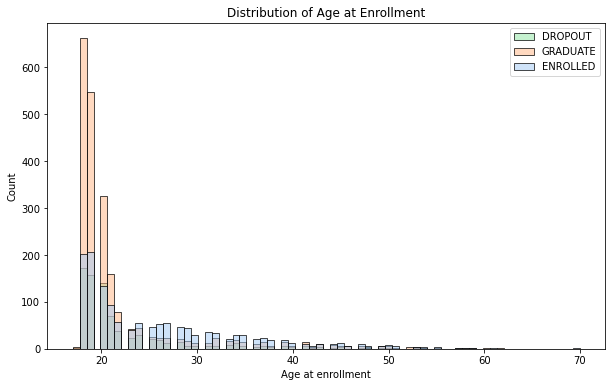

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age at enrollment", hue="Target", palette="pastel")
plt.title("Distribution of Age at Enrollment")
plt.legend(["DROPOUT", "GRADUATE", "ENROLLED"])
plt.show()

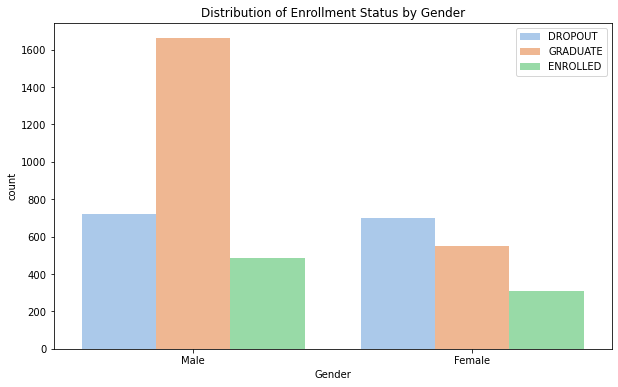

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Gender", hue="Target", palette="pastel")
plt.title("Distribution of Enrollment Status by Gender")
plt.legend(["DROPOUT", "GRADUATE", "ENROLLED"])
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.show()

# Clustering

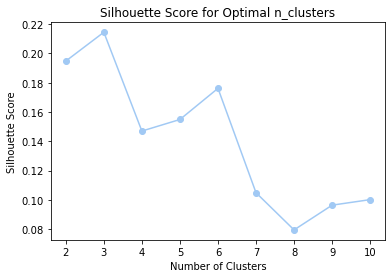

In [12]:

X = df.drop('Target', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

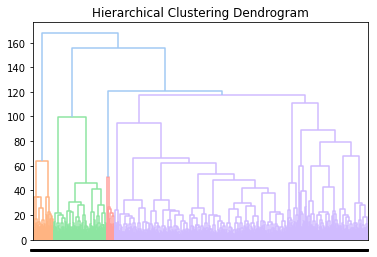

,cluster,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,KMeans Cluster,Target,Count
0,0,1.160191,17.648086,1.765203,9222.539977,0.897523,4.538007,0.004142,1.878941,19.359516,...,9.097410,5.502534,0.453611,0.117117,-0.004062,-0.017117,0.028133,0.0,1,3552
1,1,1.253440,22.827982,1.575688,7366.198394,0.863532,4.739679,-0.016872,1.849771,20.386468,...,3.850917,0.090596,-1.847736,0.285550,0.016545,0.069724,-0.114598,1.0,0,872


In [13]:
X = df.drop('Target', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans Cluster'] = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, labels=df['Target'].tolist())
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Clustering data
numeric_cols = df.drop(columns=['Target']).select_dtypes(include=['number']).columns.tolist()

categorical_cols = ['Target']

df['cluster'] = kmeans.fit_predict(X_scaled)

def mode_func(x):
    if x.name != 'Target': 
        mode_result = np.bincount(x)
        mode = np.argmax(mode_result)
        return mode
    else:
        return x.mode().iloc[0]

def count_func(x):
    return len(x)

cluster_stats_numeric = df.groupby("cluster")[numeric_cols].mean().reset_index()

cluster_stats_categorical = df.groupby("cluster")[categorical_cols].agg(mode_func).reset_index()

cluster_stats_count = df.groupby("cluster").size().reset_index(name='Count')

cluster_stats = pd.merge(cluster_stats_numeric, cluster_stats_categorical, on='cluster')
cluster_stats = pd.merge(cluster_stats, cluster_stats_count, on='cluster')

display(cluster_stats)

# Classification

In [14]:
X = df.drop(columns=['Target', 'KMeans Cluster', 'cluster'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Bagging Classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    try:
        X_train_np = X_train.values
        X_test_np = X_test.values
        
        model.fit(X_train_np, y_train)
        y_pred = model.predict(X_test_np)

        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print(f'Model: {name}')
        print(f'Accuracy: {accuracy}')
        print(f'Confusion Matrix:\n{conf_matrix}')
        print(f'Classification Report:\n{classification_rep}')
        print('------------------------')
    except Exception as e:
        print(f"Error with {name}: {e}")

C:\Users\Vanessa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6689265536723163
Confusion Matrix:
[[205  95  16]
 [ 37 380   1]
 [ 43 101   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       316
           1       0.66      0.91      0.76       418
           2       0.29      0.05      0.08       151

    accuracy                           0.67       885
   macro avg       0.56      0.53      0.51       885
weighted avg       0.62      0.67      0.62       885

------------------------
Model: Decision Tree
Accuracy: 0.6768361581920904
Confusion Matrix:
[[201  46  69]
 [ 40 336  42]
 [ 35  54  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       316
           1       0.77      0.80      0.79       418
           2       0.36      0.41      0.38       151

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.6

# Results

C:\Users\Vanessa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


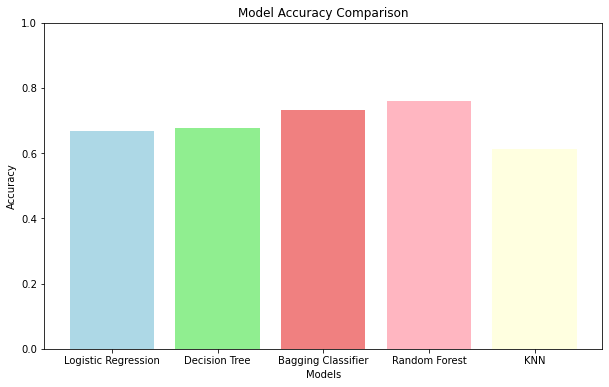

In [15]:
accuracies = []

for name, model in models.items():
    try:
        X_train_np = X_train.values
        X_test_np = X_test.values
        
        model.fit(X_train_np, y_train)
        y_pred = model.predict(X_test_np)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    except Exception as e:
        accuracies.append(np.nan)
        print(f"Error with {name}: {e}")
        
model_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color=model_colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Based on the evaluation results of different machine learning models, we can draw the following conclusions:

1. **Logistic Regression:**
   - Accuracy: 66.89%
   - The model performs reasonably well on classifying "Graduate" (1), but struggles with "Enrolled" (2) and "Dropout" (0) classes.
   - Overall, precision and recall are relatively low for all classes.

2. **Decision Tree:**
   - Accuracy: 67.68%
   - Demonstrates improved performance compared to Logistic Regression.
   - Good precision and recall for "Graduate" (1), but still struggles with "Enrolled" (2) class.

3. **Bagging Classifier :**
   - Accuracy: 73.33%
   - Provides a noticeable improvement in accuracy.
   - Achieves better precision and recall for all classes compared to Logistic Regression and Decision Tree.

4. **Random Forest:**
   - Accuracy: 75.93%
   - Outperforms other models with higher accuracy.
   - Shows good precision and recall for "Graduate" (1) and acceptable performance for other classes.

5. **KNN (K-Nearest Neighbors):**
   - Accuracy: 61.35%
   - Performs less effectively compared to other models.
   - Struggles with precision and recall for all classes, especially "Enrolled" (2).

In summary, Random Forest stands out as the top-performing model among those evaluated, achieving the highest accuracy and providing balanced precision and recall across different classes. The choice of the best model depends on the specific requirements and priorities of the application, such as the importance of correctly identifying each class or the overall accuracy of the model.